In [1]:
from load_data import load
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [3]:
(train_data, train_labels, test_data, test_labels) = load()

In [4]:
train_data.shape

(50000, 32, 32, 3)

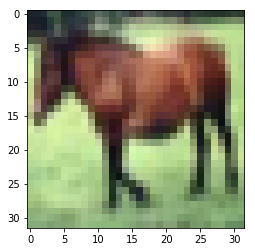

In [5]:
plt.imshow(train_data[7])

In [6]:
model = Sequential()
model.add(Conv2D(8, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D())

In [7]:
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_data, train_labels, epochs=50, verbose=2, validation_split=0.2, shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 - 8s - loss: 1.7021 - accuracy: 0.3817 - val_loss: 1.4652 - val_accuracy: 0.4723
Epoch 2/50
40000/40000 - 6s - loss: 1.3688 - accuracy: 0.5063 - val_loss: 1.2677 - val_accuracy: 0.5481
Epoch 3/50
40000/40000 - 6s - loss: 1.2428 - accuracy: 0.5540 - val_loss: 1.2986 - val_accuracy: 0.5386
Epoch 4/50
40000/40000 - 6s - loss: 1.1553 - accuracy: 0.5889 - val_loss: 1.1524 - val_accuracy: 0.5843
Epoch 5/50
40000/40000 - 6s - loss: 1.0886 - accuracy: 0.6155 - val_loss: 1.2093 - val_accuracy: 0.5744
Epoch 6/50
40000/40000 - 6s - loss: 1.0387 - accuracy: 0.6304 - val_loss: 1.0656 - val_accuracy: 0.6221
Epoch 7/50
40000/40000 - 7s - loss: 0.9977 - accuracy: 0.6439 - val_loss: 1.0691 - val_accuracy: 0.6212
Epoch 8/50
40000/40000 - 6s - loss: 0.9624 - accuracy: 0.6576 - val_loss: 1.1621 - val_accuracy: 0.5925
Epoch 9/50
40000/40000 - 6s - loss: 0.9339 - accuracy: 0.6679 - val_loss: 1.0824 - val_accuracy: 0.6232
Epoch 10/50
40

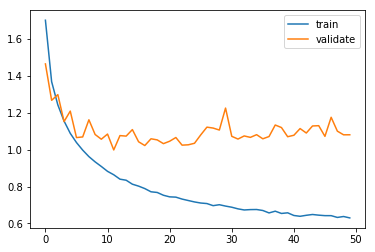

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validate'], loc='upper right')